In [1]:
import mysql.connector
import pandas as pd

In [2]:
# --- Database Connection Details ---
# IMPORTANT: Replace these with your actual MySQL credentials
DB_CONFIG = {
    'host': 'localhost',  # e.g., 'localhost' or your server IP
    'user': 'root',  # e.g., 'root'
    'password': 'TestPassword123', # Your MySQL password
    'database': 'BA'  # The name of our database
}


cnx = None # Initialize connection to None

try:
    # Establish the connection
    cnx = mysql.connector.connect(**DB_CONFIG)
    if cnx.is_connected():
        print("Successfully connected to MySQL database!")

    # --- SQL Query to combine data ---
    query = """
    SELECT
        rla.loan_id,
        rla.customer_id,
        rla.application_date,
        rla.age AS rla_age, -- Original age from raw applications
        rla.loan_amount_requested,
        rla.loan_term_months,
        rla.loan_purpose,
        rla.emi_requested AS rla_emi_requested,
        rla.collateral_flag AS rla_collateral_flag,
        rla.collateral_value AS rla_collateral_value,
        rla.loan_to_value_ratio AS rla_loan_to_value_ratio,
        rla.other_emi_declared AS rla_other_emi_declared,
        rla.debt_service_ratio_declared AS rla_debt_service_ratio_declared,
        rla.has_credit_history AS rla_has_credit_history,
        rla.is_default, -- Your target variable!
        c.gender,
        c.marital_status,
        c.education_level,
        c.residential_status,
        c.is_urban_residence,
        c.pincode, -- Customer demographics from the customers table
        elf.age, -- Engineered age (might be different or same as rla_age)
        elf.num_dependents,
        elf.time_at_current_address_months,
        elf.time_at_current_job_months,
        elf.monthly_gross_income,
        elf.declared_monthly_expenses,
        elf.emi_requested,
        elf.collateral_flag,
        elf.collateral_value,
        elf.loan_to_value_ratio,
        elf.other_emi_declared,
        elf.debt_service_ratio_declared,
        elf.has_credit_history,
        elf.credit_score,
        elf.num_credit_accounts_total,
        elf.num_credit_accounts_active,
        elf.oldest_account_age_months,
        elf.newest_account_age_months,
        elf.total_sanctioned_limit,
        elf.total_outstanding_balance,
        elf.num_defaults_reported_total,
        elf.num_settled_accounts_total,
        elf.max_dpd_past_24m,
        elf.num_revolving_accounts_active,
        elf.overall_credit_utilization_ratio,
        elf.avg_account_age_months,
        elf.ever_defaulted_flag,
        elf.num_30_dpd_last_6m,
        elf.num_90_dpd_last_12m,
        elf.avg_monthly_net_income_6m,
        elf.std_dev_monthly_net_income_6m,
        elf.longest_income_gap_days_12m,
        elf.num_distinct_income_sources_6m,
        elf.has_recurring_salary_flag,
        elf.avg_monthly_essential_expenses_6m,
        elf.avg_monthly_discretionary_expenses_6m,
        elf.essential_to_discretionary_spend_ratio,
        elf.num_recurring_bill_payments_detected,
        elf.num_overdrafts_6m,
        elf.num_bounced_transactions_6m,
        elf.large_cash_withdrawal_frequency_6m,
        elf.avg_monthly_balance_min_6m,
        elf.avg_monthly_savings_transfers_6m,
        elf.has_investment_transactions_flag,
        elf.detected_other_emis_sum,
        elf.effective_monthly_income,
        elf.total_monthly_emi_obligations,
        elf.debt_to_income_ratio_computed,
        elf.residual_income_after_emi
    FROM
        raw_loan_applications rla
    JOIN
        customers c ON rla.customer_id = c.customer_id
    JOIN
        engineered_loan_features elf ON rla.loan_id = elf.loan_id
    """

    df_combined = pd.read_sql_query(query, cnx)

except mysql.connector.Error as err:
    print(f"Error executing query or loading data: {err}")
    if err.errno == mysql.connector.errorcode.ER_ACCESS_DENIED_ERROR:
        print("Check your MySQL username and password.")
    elif err.errno == mysql.connector.errorcode.ER_BAD_DB_ERROR:
        print("Check if the database 'BA' exists.")
    else:
        print("An unexpected database error occurred.")

except Exception as e:
    print(f"An unexpected Python error occurred: {e}")




Successfully connected to MySQL database!


C:\Users\AnirudhMutnuru\AppData\Local\Temp\ipykernel_21240\1084028668.py:100: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_combined = pd.read_sql_query(query, cnx)


In [3]:
df_combined.head()  # Display the first few rows of the DataFrame

,loan_id,customer_id,application_date,rla_age,loan_amount_requested,loan_term_months,loan_purpose,rla_emi_requested,rla_collateral_flag,rla_collateral_value,...,num_bounced_transactions_6m,large_cash_withdrawal_frequency_6m,avg_monthly_balance_min_6m,avg_monthly_savings_transfers_6m,has_investment_transactions_flag,detected_other_emis_sum,effective_monthly_income,total_monthly_emi_obligations,debt_to_income_ratio_computed,residual_income_after_emi
0,LOAN00000,CUST00000,03-07-2023,34,309415,24,Personal Loan,14511.90,0,0,...,3,0,5.449338e+05,-2078.691667,1,0.0,0.000000,14511.90,999.000000,2150.140000
1,LOAN00001,CUST00001,16-08-2023,25,766119,48,Personal Loan,19846.39,0,0,...,1,0,1.455495e+06,-2495.991667,1,0.0,99080.661667,29461.50,0.297349,87787.973333
2,LOAN00002,CUST00002,19-04-2023,33,222304,48,Education Loan,5731.59,0,0,...,0,0,5.988705e+05,-2741.621667,1,0.0,43037.890000,6793.88,0.157858,63596.076667
3,LOAN00003,CUST00003,30-12-2023,38,713783,36,Credit Card,24074.36,0,0,...,0,0,5.216383e+05,-2241.228333,1,0.0,0.000000,24074.36,999.000000,-7760.451667
4,LOAN00004,CUST00004,11-08-2023,33,811451,36,Business Loan,26223.24,1,1522780,...,0,0,5.665931e+05,-2023.271667,1,0.0,30089.550000,31524.63,1.047694,17410.093333


In [4]:
df_combined.info()  # Display DataFrame info including data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 70 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   loan_id                                 5000 non-null   object 
 1   customer_id                             5000 non-null   object 
 2   application_date                        5000 non-null   object 
 3   rla_age                                 5000 non-null   int64  
 4   loan_amount_requested                   5000 non-null   int64  
 5   loan_term_months                        5000 non-null   int64  
 6   loan_purpose                            5000 non-null   object 
 7   rla_emi_requested                       5000 non-null   float64
 8   rla_collateral_flag                     5000 non-null   int64  
 9   rla_collateral_value                    5000 non-null   int64  
 10  rla_loan_to_value_ratio                 5000 non-null   floa

In [5]:
df_combined.shape

(5000, 70)

In [6]:
df_combined.describe()  # Get summary statistics for numerical columns

,rla_age,loan_amount_requested,loan_term_months,rla_emi_requested,rla_collateral_flag,rla_collateral_value,rla_loan_to_value_ratio,rla_other_emi_declared,rla_debt_service_ratio_declared,rla_has_credit_history,...,num_bounced_transactions_6m,large_cash_withdrawal_frequency_6m,avg_monthly_balance_min_6m,avg_monthly_savings_transfers_6m,has_investment_transactions_flag,detected_other_emis_sum,effective_monthly_income,total_monthly_emi_obligations,debt_to_income_ratio_computed,residual_income_after_emi
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.0,5.000000e+03,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,41.802400,527416.795200,35.812800,23186.089570,0.25180,6.382623e+05,0.113615,5842.150334,257.179452,0.700000,...,0.345800,0.0,7.145194e+05,-2490.394374,0.99900,-1415.019054,47452.585415,27613.220850,257.238237,38655.638172
std,12.472949,272242.339829,16.983105,18940.837114,0.43409,1.761942e+06,0.241410,7244.373502,436.329755,0.458303,...,0.773267,0.0,3.745126e+05,1162.263721,0.03161,12656.235473,44593.174807,23470.441579,436.295331,47808.227246
min,20.000000,50245.000000,12.000000,1100.210000,0.00000,0.000000e+00,0.000000,0.000000,0.012986,0.000000,...,0.000000,0.0,3.778926e+05,-7665.083333,0.00000,-336752.710000,0.000000,-274672.190000,-6.184801,-75664.561667
25%,31.000000,296106.500000,24.000000,10038.667500,0.00000,0.000000e+00,0.000000,0.000000,0.276093,0.000000,...,0.000000,0.0,5.018454e+05,-3244.060000,1.00000,0.000000,0.000000,14166.035000,0.333430,6627.960833
50%,42.000000,518904.500000,36.000000,18097.760000,0.00000,0.000000e+00,0.000000,3118.720000,0.567629,1.000000,...,0.000000,0.0,5.396399e+05,-2359.720833,1.00000,0.000000,37186.150000,23242.995000,0.683044,29998.301667
75%,53.000000,764236.250000,48.000000,29235.745000,1.00000,9.162150e+04,0.010057,8412.660000,999.000000,1.000000,...,0.000000,0.0,7.589377e+05,-1652.052917,1.00000,0.000000,76863.621250,36681.550000,999.000000,64995.485000
max,64.000000,999968.000000,60.000000,89968.870000,1.00000,9.986481e+06,0.999393,39723.490000,999.000000,1.000000,...,7.000000,0.0,2.635561e+06,0.000000,1.00000,0.000000,227350.101667,115135.400000,999.000000,430284.966667


In [7]:
df_combined.isnull().sum()  # Check for missing values in each column

loan_id                          0
customer_id                      0
application_date                 0
rla_age                          0
loan_amount_requested            0
                                ..
detected_other_emis_sum          0
effective_monthly_income         0
total_monthly_emi_obligations    0
debt_to_income_ratio_computed    0
residual_income_after_emi        0
Length: 70, dtype: int64

In [8]:
df_combined['is_default'].value_counts()  # Check the distribution of the target variable

is_default
0    3926
1    1074
Name: count, dtype: int64

In [9]:
df_combined['is_default'].value_counts(normalize=True) * 100
# zero is the percentage of non-defaults, one is the percentage of defaults , means who did not repay the loan

is_default
0    78.52
1    21.48
Name: proportion, dtype: float64

In [10]:
print("\n--- Categorical Column Analysis ---")

# Identify object (string) columns and also potentially categorical integer columns
categorical_cols = df_combined.select_dtypes(include=['object']).columns.tolist()

# Add any numerical columns that are actually categorical (like 0/1 flags if they weren't bools)
# Based on describe(), is_urban_residence, rla_collateral_flag, rla_has_credit_history, has_investment_transactions_flag, has_recurring_salary_flag, ever_defaulted_flag
# are already 0/1 and likely numerical. Let's focus on 'object' types first for explicit string categories.
categorical_cols




--- Categorical Column Analysis ---


['loan_id',
 'customer_id',
 'application_date',
 'loan_purpose',
 'gender',
 'marital_status',
 'education_level',
 'residential_status']

In [11]:
# Loop through each identified categorical column and print its value counts
for col in categorical_cols:
    print(df_combined[col].value_counts())
    print(f"Number of unique values: {df_combined[col].nunique()}")
    if df_combined[col].nunique() > 10: # If too many unique values, just print the top 10
        print("(Showing top 10 if more than 10 unique values)")
        print(df_combined[col].value_counts().head(10))

loan_id
LOAN00000    1
LOAN00001    1
LOAN00002    1
LOAN00003    1
LOAN00004    1
            ..
LOAN04995    1
LOAN04996    1
LOAN04997    1
LOAN04998    1
LOAN04999    1
Name: count, Length: 5000, dtype: int64
Number of unique values: 5000
(Showing top 10 if more than 10 unique values)
loan_id
LOAN00000    1
LOAN00001    1
LOAN00002    1
LOAN00003    1
LOAN00004    1
LOAN00005    1
LOAN00006    1
LOAN00007    1
LOAN00008    1
LOAN00009    1
Name: count, dtype: int64
customer_id
CUST00000    1
CUST00001    1
CUST00002    1
CUST00003    1
CUST00004    1
            ..
CUST04995    1
CUST04996    1
CUST04997    1
CUST04998    1
CUST04999    1
Name: count, Length: 5000, dtype: int64
Number of unique values: 5000
(Showing top 10 if more than 10 unique values)
customer_id
CUST00000    1
CUST00001    1
CUST00002    1
CUST00003    1
CUST00004    1
CUST00005    1
CUST00006    1
CUST00007    1
CUST00008    1
CUST00009    1
Name: count, dtype: int64
application_date
14-02-2023    15
29-09-2024

In [12]:
import pandas as pd # Ensure pandas is imported if not already in your notebook

# 1. Set 'loan_id' as the DataFrame index
df_combined.set_index('loan_id', inplace=True)
df_combined.head()



,customer_id,application_date,rla_age,loan_amount_requested,loan_term_months,loan_purpose,rla_emi_requested,rla_collateral_flag,rla_collateral_value,rla_loan_to_value_ratio,...,num_bounced_transactions_6m,large_cash_withdrawal_frequency_6m,avg_monthly_balance_min_6m,avg_monthly_savings_transfers_6m,has_investment_transactions_flag,detected_other_emis_sum,effective_monthly_income,total_monthly_emi_obligations,debt_to_income_ratio_computed,residual_income_after_emi
loan_id,,,,,,,,,,,,,,,,,,,,,
LOAN00000,CUST00000,03-07-2023,34,309415,24,Personal Loan,14511.90,0,0,0.000000,...,3,0,5.449338e+05,-2078.691667,1,0.0,0.000000,14511.90,999.000000,2150.140000
LOAN00001,CUST00001,16-08-2023,25,766119,48,Personal Loan,19846.39,0,0,0.000000,...,1,0,1.455495e+06,-2495.991667,1,0.0,99080.661667,29461.50,0.297349,87787.973333
LOAN00002,CUST00002,19-04-2023,33,222304,48,Education Loan,5731.59,0,0,0.000000,...,0,0,5.988705e+05,-2741.621667,1,0.0,43037.890000,6793.88,0.157858,63596.076667
LOAN00003,CUST00003,30-12-2023,38,713783,36,Credit Card,24074.36,0,0,0.000000,...,0,0,5.216383e+05,-2241.228333,1,0.0,0.000000,24074.36,999.000000,-7760.451667
LOAN00004,CUST00004,11-08-2023,33,811451,36,Business Loan,26223.24,1,1522780,0.532875,...,0,0,5.665931e+05,-2023.271667,1,0.0,30089.550000,31524.63,1.047694,17410.093333


In [13]:
# 2. Convert 'application_date' to datetime objects
df_combined['application_date'] = pd.to_datetime(df_combined['application_date'], errors='coerce')  # Use format to ensure correct parsing
df_combined.info() # Check the dtype of application_date



<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, LOAN00000 to LOAN04999
Data columns (total 69 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   customer_id                             5000 non-null   object        
 1   application_date                        1936 non-null   datetime64[ns]
 2   rla_age                                 5000 non-null   int64         
 3   loan_amount_requested                   5000 non-null   int64         
 4   loan_term_months                        5000 non-null   int64         
 5   loan_purpose                            5000 non-null   object        
 6   rla_emi_requested                       5000 non-null   float64       
 7   rla_collateral_flag                     5000 non-null   int64         
 8   rla_collateral_value                    5000 non-null   int64         
 9   rla_loan_to_value_ratio                 5000

In [14]:
df_combined.drop('customer_id', axis=1, inplace=True)
df_combined.head()


,application_date,rla_age,loan_amount_requested,loan_term_months,loan_purpose,rla_emi_requested,rla_collateral_flag,rla_collateral_value,rla_loan_to_value_ratio,rla_other_emi_declared,...,num_bounced_transactions_6m,large_cash_withdrawal_frequency_6m,avg_monthly_balance_min_6m,avg_monthly_savings_transfers_6m,has_investment_transactions_flag,detected_other_emis_sum,effective_monthly_income,total_monthly_emi_obligations,debt_to_income_ratio_computed,residual_income_after_emi
loan_id,,,,,,,,,,,,,,,,,,,,,
LOAN00000,2023-03-07,34,309415,24,Personal Loan,14511.90,0,0,0.000000,0.00,...,3,0,5.449338e+05,-2078.691667,1,0.0,0.000000,14511.90,999.000000,2150.140000
LOAN00001,NaT,25,766119,48,Personal Loan,19846.39,0,0,0.000000,9615.11,...,1,0,1.455495e+06,-2495.991667,1,0.0,99080.661667,29461.50,0.297349,87787.973333
LOAN00002,NaT,33,222304,48,Education Loan,5731.59,0,0,0.000000,1062.29,...,0,0,5.988705e+05,-2741.621667,1,0.0,43037.890000,6793.88,0.157858,63596.076667
LOAN00003,NaT,38,713783,36,Credit Card,24074.36,0,0,0.000000,0.00,...,0,0,5.216383e+05,-2241.228333,1,0.0,0.000000,24074.36,999.000000,-7760.451667
LOAN00004,2023-11-08,33,811451,36,Business Loan,26223.24,1,1522780,0.532875,5301.39,...,0,0,5.665931e+05,-2023.271667,1,0.0,30089.550000,31524.63,1.047694,17410.093333


In [15]:
print("\n--- Updated Categorical Column Analysis ---")

# Re-identify object (string) columns after previous transformations
categorical_cols_for_encoding = df_combined.select_dtypes(include=['object']).columns.tolist()

categorical_cols_for_encoding




--- Updated Categorical Column Analysis ---


['loan_purpose',
 'gender',
 'marital_status',
 'education_level',
 'residential_status']

In [16]:
# Loop through each identified categorical column and print its value counts
for col in categorical_cols_for_encoding:
    print(df_combined[col].value_counts())
    print(f"Number of unique values: {df_combined[col].nunique()}")
    if df_combined[col].nunique() > 10: # If too many unique values, just print the top 10
        print(df_combined[col].value_counts().head(10))

loan_purpose
Credit Card       865
Personal Loan     852
Home Loan         836
Auto Loan         830
Education Loan    811
Business Loan     806
Name: count, dtype: int64
Number of unique values: 6
gender
Female    1682
Male      1675
Other     1643
Name: count, dtype: int64
Number of unique values: 3
marital_status
Single      1307
Divorced    1269
Married     1244
Widowed     1180
Name: count, dtype: int64
Number of unique values: 4
education_level
Doctorate        1300
High School      1263
Post-Graduate    1249
Graduate         1188
Name: count, dtype: int64
Number of unique values: 4
residential_status
Parental     1269
Owned        1254
Mortgaged    1242
Rented       1235
Name: count, dtype: int64
Number of unique values: 4


In [17]:
import pandas as pd # Ensure pandas is imported if not already

# Define the list of categorical columns to encode
categorical_cols_to_encode = ['loan_purpose', 'gender', 'marital_status', 'education_level', 'residential_status']

# Apply one-hot encoding
# drop_first=True prevents multicollinearity by dropping one category per feature
df_combined_encoded = pd.get_dummies(df_combined, columns=categorical_cols_to_encode, drop_first=True)


In [18]:
df_combined.shape


(5000, 68)

In [19]:
df_combined_encoded.shape



(5000, 79)

In [20]:

df_combined_encoded.head()

,application_date,rla_age,loan_amount_requested,loan_term_months,rla_emi_requested,rla_collateral_flag,rla_collateral_value,rla_loan_to_value_ratio,rla_other_emi_declared,rla_debt_service_ratio_declared,...,gender_Other,marital_status_Married,marital_status_Single,marital_status_Widowed,education_level_Graduate,education_level_High School,education_level_Post-Graduate,residential_status_Owned,residential_status_Parental,residential_status_Rented
loan_id,,,,,,,,,,,,,,,,,,,,,
LOAN00000,2023-03-07,34,309415,24,14511.90,0,0,0.000000,0.00,999.000000,...,False,False,True,False,True,False,False,False,False,False
LOAN00001,NaT,25,766119,48,19846.39,0,0,0.000000,9615.11,0.191594,...,True,False,False,False,False,True,False,False,True,False
LOAN00002,NaT,33,222304,48,5731.59,0,0,0.000000,1062.29,0.157858,...,False,False,False,True,False,False,True,False,False,False
LOAN00003,NaT,38,713783,36,24074.36,0,0,0.000000,0.00,999.000000,...,False,True,False,False,False,True,False,True,False,False
LOAN00004,2023-11-08,33,811451,36,26223.24,1,1522780,0.532875,5301.39,1.047694,...,False,True,False,False,False,True,False,False,False,True


In [21]:
df_combined_encoded.info()  # Check dtypes and non-null counts after encoding

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, LOAN00000 to LOAN04999
Data columns (total 79 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   application_date                        1936 non-null   datetime64[ns]
 1   rla_age                                 5000 non-null   int64         
 2   loan_amount_requested                   5000 non-null   int64         
 3   loan_term_months                        5000 non-null   int64         
 4   rla_emi_requested                       5000 non-null   float64       
 5   rla_collateral_flag                     5000 non-null   int64         
 6   rla_collateral_value                    5000 non-null   int64         
 7   rla_loan_to_value_ratio                 5000 non-null   float64       
 8   rla_other_emi_declared                  5000 non-null   float64       
 9   rla_debt_service_ratio_declared         5000

In [22]:
import pandas as pd # Ensure pandas is imported if not already


# Extract time-based features from non-null dates
# Using .dt accessor only works if the column is datetime, which it is.
df_combined_encoded['application_month'] = df_combined_encoded['application_date'].dt.month
df_combined_encoded['application_day_of_week'] = df_combined_encoded['application_date'].dt.dayofweek # Monday=0, Sunday=6
df_combined_encoded['application_year'] = df_combined_encoded['application_date'].dt.year
df_combined_encoded['application_day_of_month'] = df_combined_encoded['application_date'].dt.day

# Create a flag for missing application date
df_combined_encoded['is_application_date_missing'] = df_combined_encoded['application_date'].isnull().astype(int)



In [23]:
# Drop the original 'application_date' column
print("Dropping original 'application_date' column...")
df_combined_encoded.drop('application_date', axis=1, inplace=True)

print("\nDataFrame Info after date handling:")
df_combined_encoded.info()



Dropping original 'application_date' column...

DataFrame Info after date handling:
<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, LOAN00000 to LOAN04999
Data columns (total 83 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   rla_age                                 5000 non-null   int64  
 1   loan_amount_requested                   5000 non-null   int64  
 2   loan_term_months                        5000 non-null   int64  
 3   rla_emi_requested                       5000 non-null   float64
 4   rla_collateral_flag                     5000 non-null   int64  
 5   rla_collateral_value                    5000 non-null   int64  
 6   rla_loan_to_value_ratio                 5000 non-null   float64
 7   rla_other_emi_declared                  5000 non-null   float64
 8   rla_debt_service_ratio_declared         5000 non-null   float64
 9   rla_has_credit_history               

In [24]:
print("\nValue counts for new 'is_application_date_missing' flag:")
print(df_combined_encoded['is_application_date_missing'].value_counts())




Value counts for new 'is_application_date_missing' flag:
is_application_date_missing
1    3064
0    1936
Name: count, dtype: int64


In [25]:
print("\nFirst few rows of new date-related features:")
print(df_combined_encoded[['application_month', 'application_day_of_week', 'application_year', 'application_day_of_month', 'is_application_date_missing']].head())


First few rows of new date-related features:
           application_month  application_day_of_week  application_year  \
loan_id                                                                   
LOAN00000                3.0                      1.0            2023.0   
LOAN00001                NaN                      NaN               NaN   
LOAN00002                NaN                      NaN               NaN   
LOAN00003                NaN                      NaN               NaN   
LOAN00004               11.0                      2.0            2023.0   

           application_day_of_month  is_application_date_missing  
loan_id                                                           
LOAN00000                       7.0                            0  
LOAN00001                       NaN                            1  
LOAN00002                       NaN                            1  
LOAN00003                       NaN                            1  
LOAN00004                 

In [26]:
import numpy as np # Often useful for numerical operations

date_derived_cols_to_impute = [
    'application_month',
    'application_day_of_week',
    'application_year',
    'application_day_of_month'
]

for col in date_derived_cols_to_impute:
    # Calculate the mode. .mode()[0] is used because .mode() can return multiple modes
    # and we just want the first one.
    mode_value = df_combined_encoded[col].mode()[0]
    df_combined_encoded[col].fillna(mode_value, inplace=True)
    print(f"Imputed '{col}' with mode: {mode_value}")

# Convert these columns to integer type as they should be discrete numbers
for col in date_derived_cols_to_impute:
    df_combined_encoded[col] = df_combined_encoded[col].astype(int)

df_combined_encoded.info()


Imputed 'application_month' with mode: 10.0
Imputed 'application_day_of_week' with mode: 3.0
Imputed 'application_year' with mode: 2024.0
Imputed 'application_day_of_month' with mode: 4.0
<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, LOAN00000 to LOAN04999
Data columns (total 83 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   rla_age                                 5000 non-null   int64  
 1   loan_amount_requested                   5000 non-null   int64  
 2   loan_term_months                        5000 non-null   int64  
 3   rla_emi_requested                       5000 non-null   float64
 4   rla_collateral_flag                     5000 non-null   int64  
 5   rla_collateral_value                    5000 non-null   int64  
 6   rla_loan_to_value_ratio                 5000 non-null   float64
 7   rla_other_emi_declared                  5000 non-null   float64
 8   rl

C:\Users\AnirudhMutnuru\AppData\Local\Temp\ipykernel_21240\3951984551.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_combined_encoded[col].fillna(mode_value, inplace=True)


In [27]:

print("\nCheck missing values for date-derived features:")
print(df_combined_encoded[date_derived_cols_to_impute].isnull().sum())


Check missing values for date-derived features:
application_month           0
application_day_of_week     0
application_year            0
application_day_of_month    0
dtype: int64


In [28]:
df_combined_encoded.head()  # Check dtypes and non-null counts after encoding

,rla_age,loan_amount_requested,loan_term_months,rla_emi_requested,rla_collateral_flag,rla_collateral_value,rla_loan_to_value_ratio,rla_other_emi_declared,rla_debt_service_ratio_declared,rla_has_credit_history,...,education_level_High School,education_level_Post-Graduate,residential_status_Owned,residential_status_Parental,residential_status_Rented,application_month,application_day_of_week,application_year,application_day_of_month,is_application_date_missing
loan_id,,,,,,,,,,,,,,,,,,,,,
LOAN00000,34,309415,24,14511.90,0,0,0.000000,0.00,999.000000,1,...,False,False,False,False,False,3,1,2023,7,0
LOAN00001,25,766119,48,19846.39,0,0,0.000000,9615.11,0.191594,1,...,True,False,False,True,False,10,3,2024,4,1
LOAN00002,33,222304,48,5731.59,0,0,0.000000,1062.29,0.157858,0,...,False,True,False,False,False,10,3,2024,4,1
LOAN00003,38,713783,36,24074.36,0,0,0.000000,0.00,999.000000,1,...,True,False,True,False,False,10,3,2024,4,1
LOAN00004,33,811451,36,26223.24,1,1522780,0.532875,5301.39,1.047694,1,...,True,False,False,False,True,11,2,2023,8,0


In [29]:

columns_to_check = [
    'debt_to_income_ratio_computed',
    'essential_to_discretionary_spend_ratio'
]

for col in columns_to_check:
    count_999 = (df_combined_encoded[col] == 999.0).sum()
    print(f"Column '{col}': {count_999} instances of 999.0")
    if count_999 > 0:
        # Also check other high values around 999 if it's not exact
        print(f"  Max value for '{col}': {df_combined_encoded[col].max()}")
        print(f"  Unique values for '{col}' (top 5 if many): {df_combined_encoded[col].value_counts().nlargest(5)}")

Column 'debt_to_income_ratio_computed': 1285 instances of 999.0
  Max value for 'debt_to_income_ratio_computed': 999.0
  Unique values for 'debt_to_income_ratio_computed' (top 5 if many): debt_to_income_ratio_computed
999.000000    1285
0.297349         1
0.157858         1
1.047694         1
0.222900         1
Name: count, dtype: int64
Column 'essential_to_discretionary_spend_ratio': 0 instances of 999.0


In [30]:
import numpy as np # Ensure numpy is imported

# 1. Create a new binary flag column
df_combined_encoded['debt_to_income_ratio_computed_is_999'] = (df_combined_encoded['debt_to_income_ratio_computed'] == 999.0).astype(int)
df_combined_encoded['debt_to_income_ratio_computed_is_999'].value_counts()



debt_to_income_ratio_computed_is_999
0    3715
1    1285
Name: count, dtype: int64

In [31]:
# 2. Replace 999.0 with NaN in the original column
df_combined_encoded['debt_to_income_ratio_computed'].replace(999.0, np.nan, inplace=True)
df_combined_encoded['debt_to_income_ratio_computed'].isnull().sum()



C:\Users\AnirudhMutnuru\AppData\Local\Temp\ipykernel_21240\3293938370.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_combined_encoded['debt_to_income_ratio_computed'].replace(999.0, np.nan, inplace=True)


np.int64(1285)

In [32]:

median_dti = df_combined_encoded['debt_to_income_ratio_computed'].median()
df_combined_encoded['debt_to_income_ratio_computed'].fillna(median_dti, inplace=True)
print(f"\nImputed NaNs in 'debt_to_income_ratio_computed' with median: {median_dti}")



Imputed NaNs in 'debt_to_income_ratio_computed' with median: 0.46900352016583646


C:\Users\AnirudhMutnuru\AppData\Local\Temp\ipykernel_21240\142177539.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_combined_encoded['debt_to_income_ratio_computed'].fillna(median_dti, inplace=True)


In [33]:

df_combined_encoded['debt_to_income_ratio_computed'].isnull().sum()

df_combined_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, LOAN00000 to LOAN04999
Data columns (total 84 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   rla_age                                 5000 non-null   int64  
 1   loan_amount_requested                   5000 non-null   int64  
 2   loan_term_months                        5000 non-null   int64  
 3   rla_emi_requested                       5000 non-null   float64
 4   rla_collateral_flag                     5000 non-null   int64  
 5   rla_collateral_value                    5000 non-null   int64  
 6   rla_loan_to_value_ratio                 5000 non-null   float64
 7   rla_other_emi_declared                  5000 non-null   float64
 8   rla_debt_service_ratio_declared         5000 non-null   float64
 9   rla_has_credit_history                  5000 non-null   int64  
 10  is_default                              5000 non-nul

In [34]:
import pandas as pd # Ensure pandas is imported if not already

print("\n--- Ranges (Min and Max) of Numerical Columns BEFORE Scaling ---")

# First, define X and the list of numerical_cols_to_scale again
# This ensures we're working with the correct, pre-scaled data
X = df_combined_encoded.drop('is_default', axis=1)

# Re-identify numerical columns to scale, similar to the previous step
numerical_cols_to_scale = []
binary_flag_cols = [
    'rla_collateral_flag', 'rla_has_credit_history', 'is_urban_residence',
    'has_credit_history', 'collateral_flag', 'ever_defaulted_flag',
    'has_recurring_salary_flag', 'has_investment_transactions_flag',
    'is_application_date_missing', 'debt_to_income_ratio_computed_is_999'
]
all_numeric_cols_in_X = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

numerical_cols_to_scale = [col for col in all_numeric_cols_in_X if
                           col not in binary_flag_cols and
                           X[col].nunique() > 2] # Exclude binary (0/1) ints


# Now, iterate through these columns and print their min and max
for col in numerical_cols_to_scale:
    min_val = X[col].min()
    max_val = X[col].max()
    print(f"'{col}': Min = {min_val:.2f}, Max = {max_val:.2f}")


--- Ranges (Min and Max) of Numerical Columns BEFORE Scaling ---
'rla_age': Min = 20.00, Max = 64.00
'loan_amount_requested': Min = 50245.00, Max = 999968.00
'loan_term_months': Min = 12.00, Max = 60.00
'rla_emi_requested': Min = 1100.21, Max = 89968.87
'rla_collateral_value': Min = 0.00, Max = 9986481.00
'rla_loan_to_value_ratio': Min = 0.00, Max = 1.00
'rla_other_emi_declared': Min = 0.00, Max = 39723.49
'rla_debt_service_ratio_declared': Min = 0.01, Max = 999.00
'pincode': Min = 19.00, Max = 999958.00
'age': Min = 20.00, Max = 64.00
'num_dependents': Min = 0.00, Max = 5.00
'time_at_current_address_months': Min = 6.00, Max = 240.00
'time_at_current_job_months': Min = 0.00, Max = 360.00
'monthly_gross_income': Min = 0.00, Max = 199967.47
'declared_monthly_expenses': Min = 0.00, Max = 136471.79
'emi_requested': Min = 1100.21, Max = 89968.87
'collateral_value': Min = 0.00, Max = 9986481.00
'loan_to_value_ratio': Min = 0.00, Max = 1.00
'other_emi_declared': Min = 0.00, Max = 39723.49
'd

In [35]:
from sklearn.preprocessing import StandardScaler
import pandas as pd # Ensure pandas is imported if not already in your notebook

print("\n--- Performing Feature Scaling (Standardization) ---")

# Separate target variable from features before scaling
# X will contain all features, y will contain the target (is_default)
X = df_combined_encoded.drop('is_default', axis=1)
y = df_combined_encoded['is_default']

# Identify numerical columns to scale
# These are float64 and int64 columns, excluding boolean-like int64s (0/1 flags)
# and excluding any columns where min/max are 0/1 which might be implicit flags.
numerical_cols_to_scale = []
# Explicitly list columns that are binary (0/1) but might be int64 or float64
# We will exclude these from scaling
binary_flag_cols = [
    'rla_collateral_flag', 'rla_has_credit_history', 'is_urban_residence',
    'has_credit_history', 'collateral_flag', 'ever_defaulted_flag',
    'has_recurring_salary_flag', 'has_investment_transactions_flag',
    'is_application_date_missing', 'debt_to_income_ratio_computed_is_999'
]

# Let's refine the selection of numerical columns to scale:
# Start with all numerical columns in X
all_numeric_cols_in_X = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols_to_scale = [col for col in all_numeric_cols_in_X if
                           col not in binary_flag_cols and
                           X[col].nunique() > 2] # Exclude binary (0/1) ints

print(f"Numerical columns identified for scaling ({len(numerical_cols_to_scale)}):")
print(numerical_cols_to_scale)

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling only to the identified numerical columns
# Store scaled data in a temporary DataFrame
X_scaled_numerical = scaler.fit_transform(X[numerical_cols_to_scale])

# Convert the scaled array back to a DataFrame with column names
X_scaled_numerical_df = pd.DataFrame(X_scaled_numerical, columns=numerical_cols_to_scale, index=X.index)

# Combine the scaled numerical columns with the unscaled (binary, one-hot encoded, flags) columns
# First, drop the original numerical columns from X
X_other_features = X.drop(columns=numerical_cols_to_scale)

# Concatenate the scaled numerical features with the other features
X_processed = pd.concat([X_other_features, X_scaled_numerical_df], axis=1)




--- Performing Feature Scaling (Standardization) ---
Numerical columns identified for scaling (55):
['rla_age', 'loan_amount_requested', 'loan_term_months', 'rla_emi_requested', 'rla_collateral_value', 'rla_loan_to_value_ratio', 'rla_other_emi_declared', 'rla_debt_service_ratio_declared', 'pincode', 'age', 'num_dependents', 'time_at_current_address_months', 'time_at_current_job_months', 'monthly_gross_income', 'declared_monthly_expenses', 'emi_requested', 'collateral_value', 'loan_to_value_ratio', 'other_emi_declared', 'debt_service_ratio_declared', 'credit_score', 'num_credit_accounts_total', 'num_credit_accounts_active', 'oldest_account_age_months', 'newest_account_age_months', 'total_sanctioned_limit', 'total_outstanding_balance', 'num_defaults_reported_total', 'num_settled_accounts_total', 'max_dpd_past_24m', 'num_revolving_accounts_active', 'overall_credit_utilization_ratio', 'avg_account_age_months', 'num_30_dpd_last_6m', 'num_90_dpd_last_12m', 'avg_monthly_net_income_6m', 'std_

In [36]:
X_processed.shape


(5000, 83)

In [37]:

X_processed['loan_amount_requested'].describe()


count    5.000000e+03
mean    -1.861622e-16
std      1.000100e+00
min     -1.752922e+00
25%     -8.497335e-01
50%     -3.127047e-02
75%      8.699717e-01
max      1.735948e+00
Name: loan_amount_requested, dtype: float64

In [38]:
X_processed['rla_age'].describe()


count    5.000000e+03
mean     8.384404e-17
std      1.000100e+00
min     -1.748150e+00
25%     -8.661528e-01
50%      1.584387e-02
75%      8.978406e-01
max      1.779837e+00
Name: rla_age, dtype: float64

In [39]:
X_processed['is_application_date_missing'].describe()

count    5000.000000
mean        0.612800
std         0.487159
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: is_application_date_missing, dtype: float64

In [40]:
X_processed.head()  # Display the first few rows of the processed DataFrame

,rla_collateral_flag,rla_has_credit_history,is_urban_residence,collateral_flag,has_credit_history,ever_defaulted_flag,has_recurring_salary_flag,large_cash_withdrawal_frequency_6m,has_investment_transactions_flag,loan_purpose_Business Loan,...,avg_monthly_balance_min_6m,avg_monthly_savings_transfers_6m,detected_other_emis_sum,effective_monthly_income,total_monthly_emi_obligations,debt_to_income_ratio_computed,residual_income_after_emi,application_month,application_day_of_week,application_day_of_month
loan_id,,,,,,,,,,,,,,,,,,,,,
LOAN00000,0,1,1,0,1,0.0,0,0,1,False,...,-0.452862,0.354260,0.111815,-1.064229,-0.558261,-0.212665,-0.763658,-2.081945,-1.616971,0.826581
LOAN00001,0,1,1,0,1,0.0,1,0,1,False,...,1.978704,-0.004816,0.111815,1.157873,0.078757,-0.461391,1.027799,0.487361,-0.007885,-0.392325
LOAN00002,0,0,1,0,0,0.0,0,0,1,False,...,-0.308829,-0.216175,0.111815,-0.099009,-0.887134,-0.663511,0.521729,0.487361,-0.007885,-0.392325
LOAN00003,0,1,1,0,1,0.0,0,0,1,False,...,-0.515071,0.214401,0.111815,-1.064229,-0.150795,-0.212665,-0.970978,0.487361,-0.007885,-0.392325
LOAN00004,1,1,0,1,1,0.0,0,0,1,True,...,-0.395023,0.401948,0.111815,-0.389404,0.166669,0.625851,-0.444435,0.854404,-0.812428,1.232883


In [41]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

print("\n--- Splitting Data into Training and Testing Sets ---")



# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, # X_processed is your feature set, y is your target
    test_size=0.2,      # 20% of data for testing
    random_state=42,    # For reproducibility of results
    stratify=y          # CRUCIAL: Ensures class distribution is maintained in splits
)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")




--- Splitting Data into Training and Testing Sets ---
Shape of X_train: (4000, 83)
Shape of X_test: (1000, 83)
Shape of y_train: (4000,)
Shape of y_test: (1000,)


In [42]:
print("\nClass distribution in original 'y' dataset:")
print(y.value_counts(normalize=True) * 100)

print("\nClass distribution in 'y_train' (training target):")
print(y_train.value_counts(normalize=True) * 100)

print("\nClass distribution in 'y_test' (testing target):")
print(y_test.value_counts(normalize=True) * 100)


Class distribution in original 'y' dataset:
is_default
0    78.52
1    21.48
Name: proportion, dtype: float64

Class distribution in 'y_train' (training target):
is_default
0    78.525
1    21.475
Name: proportion, dtype: float64

Class distribution in 'y_test' (testing target):
is_default
0    78.5
1    21.5
Name: proportion, dtype: float64


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import pandas as pd
import numpy as np

log_reg_model = LogisticRegression(solver='liblinear', random_state=42)

# Train the model using the training data (X_train and y_train)
log_reg_model.fit(X_train, y_train)
y_pred = log_reg_model.predict(X_test)
y_pred_proba = log_reg_model.predict_proba(X_test)[:, 1]



In [44]:
# 1. Confusion Matrix: A fundamental evaluation metric
print("\nConfusion Matrix:")
# Rows are actual labels, columns are predicted labels
# [[True Negatives (TN), False Positives (FP)],
#  [False Negatives (FN), True Negitives (FN)]]
print(confusion_matrix(y_test, y_pred))




Confusion Matrix:
[[770  15]
 [ 58 157]]


In [45]:
# 2. Classification Report: Provides Precision, Recall, F1-score, and Support for each class
# This is crucial for understanding performance on imbalanced datasets.
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       785
           1       0.91      0.73      0.81       215

    accuracy                           0.93      1000
   macro avg       0.92      0.86      0.88      1000
weighted avg       0.93      0.93      0.92      1000



In [46]:
# 3. ROC-AUC Score: Measures the ability of the classifier to distinguish between classes
# A good overall metric for imbalanced binary classification.
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC-AUC Score: {roc_auc:.4f}")



ROC-AUC Score: 0.9279


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import pandas as pd
import numpy as np

rf_model_balanced = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model_balanced.fit(X_train, y_train)
y_pred_rf_balanced = rf_model_balanced.predict(X_test)
y_pred_proba_rf_balanced = rf_model_balanced.predict_proba(X_test)[:, 1] # Probabilities for the positive class (1)


In [48]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import numpy as np

# y_test and y_pred_proba_rf_balanced should be available from your previous steps.

print("\n--- Metrics for Prediction Threshold: 0.30 ---")

# Reclassify predictions based on the 0.30 threshold
y_pred_at_0_30 = (y_pred_proba_rf_balanced >= 0.30).astype(int)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_at_0_30))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_at_0_30))

# ROC-AUC score remains constant regardless of classification threshold
# print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_rf_balanced):.4f}")


--- Metrics for Prediction Threshold: 0.30 ---
Confusion Matrix:
[[751  34]
 [ 42 173]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       785
           1       0.84      0.80      0.82       215

    accuracy                           0.92      1000
   macro avg       0.89      0.88      0.89      1000
weighted avg       0.92      0.92      0.92      1000



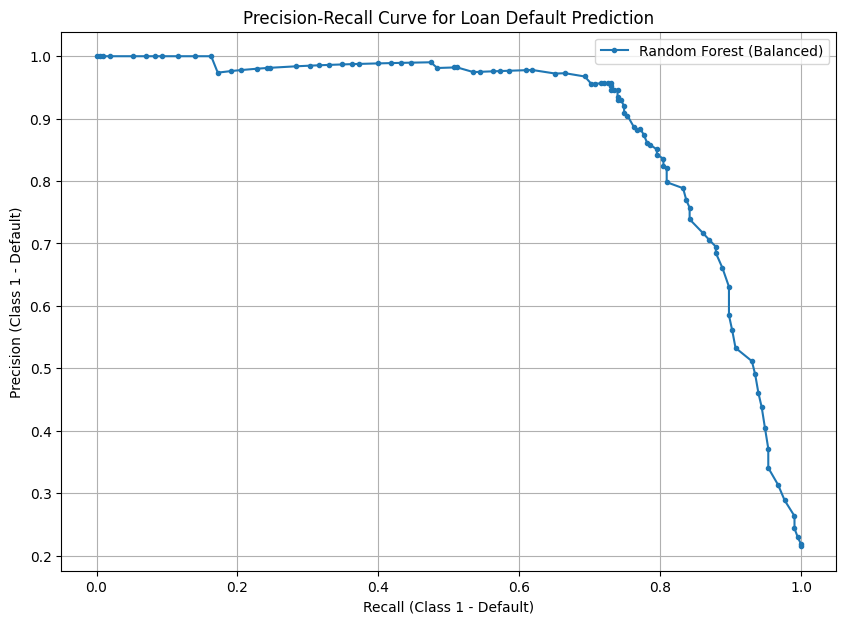

In [49]:
from sklearn.metrics import precision_recall_curve, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np


precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba_rf_balanced)

# Plotting the Precision-Recall curve
plt.figure(figsize=(10, 7))
plt.plot(recalls, precisions, marker='.', label='Random Forest (Balanced)')
plt.xlabel('Recall (Class 1 - Default)')
plt.ylabel('Precision (Class 1 - Default)')
plt.title('Precision-Recall Curve for Loan Default Prediction')
plt.grid(True)
plt.legend()
plt.show()



In [62]:
import pandas as pd
import numpy as np

# Calculate the scale_pos_weight for XGBoost
count_class_0 = y_train.value_counts()[0]
count_class_1 = y_train.value_counts()[1]
scale_pos_weight_value = count_class_0 / count_class_1

print(f"Count of non-defaults (0) in training data: {count_class_0}")
print(f"Count of defaults (1) in training data: {count_class_1}")
print(f"Recommended scale_pos_weight: {scale_pos_weight_value:.2f}")

Count of non-defaults (0) in training data: 3141
Count of defaults (1) in training data: 859
Recommended scale_pos_weight: 3.66


In [66]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


# Re-run the scale_pos_weight calculation if you restarted your kernel
count_class_0 = y_train.value_counts()[0]
count_class_1 = y_train.value_counts()[1]
scale_pos_weight_value = count_class_0 / count_class_1

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic', # For binary classification
    n_estimators=100,             # Number of boosting rounds (trees)
    learning_rate=0.1,            # Step size shrinkage to prevent overfitting
    use_label_encoder=False,      # Suppresses a common warning
    eval_metric='logloss',        # Evaluation metric for optimization
    random_state=42,              # For reproducibility
    scale_pos_weight=scale_pos_weight_value
)

# Train the model using the training data
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1] # Probabilities for the positive class (1)



c:\Users\AnirudhMutnuru\OneDrive\Desktop\BA\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:50:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [67]:
# 1. Confusion Matrix
print("\nConfusion Matrix (XGBoost - Default Threshold 0.5):")
print(confusion_matrix(y_test, y_pred_xgb))




Confusion Matrix (XGBoost - Default Threshold 0.5):
[[762  23]
 [ 43 172]]


In [68]:
# 2. Classification Report (Precision, Recall, F1-score)
print("\nClassification Report (XGBoost - Default Threshold 0.5):")
print(classification_report(y_test, y_pred_xgb))



Classification Report (XGBoost - Default Threshold 0.5):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       785
           1       0.88      0.80      0.84       215

    accuracy                           0.93      1000
   macro avg       0.91      0.89      0.90      1000
weighted avg       0.93      0.93      0.93      1000



In [61]:

# 3. ROC-AUC Score
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
print(f"\nROC-AUC Score (XGBoost): {roc_auc_xgb:.4f}")



ROC-AUC Score (XGBoost): 0.9472


In [69]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import pandas as pd
import numpy as np

print("\n--- Starting XGBoost Hyperparameter Tuning with RandomizedSearchCV ---")

# Re-calculate scale_pos_weight just in case (ensure X_train, y_train are available)
count_class_0 = y_train.value_counts()[0]
count_class_1 = y_train.value_counts()[1]
scale_pos_weight_value = count_class_0 / count_class_1
print(f"Using scale_pos_weight: {scale_pos_weight_value:.2f}")

# Define the XGBoost model base
xgb_base_model = xgb.XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=scale_pos_weight_value # Keep this for imbalance handling
)

# Define the parameter distribution for RandomizedSearchCV
# We'll use distributions for continuous parameters (uniform) and ranges for discrete (randint)
param_distributions = {
    'n_estimators': randint(100, 1000),      # Number of boosting rounds
    'learning_rate': uniform(0.01, 0.2),     # Step size shrinkage
    'max_depth': randint(3, 10),             # Maximum depth of a tree
    'subsample': uniform(0.6, 0.4),          # Subsample ratio of the training instance
    'colsample_bytree': uniform(0.6, 0.4),   # Subsample ratio of columns when constructing each tree
    'gamma': uniform(0, 0.5),                # Minimum loss reduction required to make a further partition
    'min_child_weight': randint(1, 10)       # Minimum sum of instance weight (hessian) needed in a child
}

random_search = RandomizedSearchCV(
    estimator=xgb_base_model,
    param_distributions=param_distributions,
    n_iter=100, # Number of different combinations to try
    cv=5,       # 5-fold cross-validation
    scoring='roc_auc',
    verbose=2,
    random_state=42,
    n_jobs=-1   # Use all available CPU cores
)

# Fit the random search to the data
random_search.fit(X_train, y_train)

print(f"Best ROC-AUC score found: {random_search.best_score_:.4f}")
print(f"Best hyperparameters found: {random_search.best_params_}")

# Get the best model
best_xgb_model = random_search.best_estimator_

# Make predictions on the test set with the best model
y_pred_tuned_xgb = best_xgb_model.predict(X_test)
y_pred_proba_tuned_xgb = best_xgb_model.predict_proba(X_test)[:, 1]




--- Starting XGBoost Hyperparameter Tuning with RandomizedSearchCV ---
Using scale_pos_weight: 3.66
Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\AnirudhMutnuru\OneDrive\Desktop\BA\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:02:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best ROC-AUC score found: 0.9543
Best hyperparameters found: {'colsample_bytree': np.float64(0.9022204554172195), 'gamma': np.float64(0.11439908274581123), 'learning_rate': np.float64(0.0253959819657586), 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 185, 'subsample': np.float64(0.9521871356061031)}


In [70]:
# 1. Confusion Matrix
print("\nConfusion Matrix (Tuned XGBoost - Default Threshold 0.5):")
print(confusion_matrix(y_test, y_pred_tuned_xgb))



Confusion Matrix (Tuned XGBoost - Default Threshold 0.5):
[[753  32]
 [ 38 177]]


In [71]:

# 2. Classification Report
print("\nClassification Report (Tuned XGBoost - Default Threshold 0.5):")
print(classification_report(y_test, y_pred_tuned_xgb))



Classification Report (Tuned XGBoost - Default Threshold 0.5):
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       785
           1       0.85      0.82      0.83       215

    accuracy                           0.93      1000
   macro avg       0.90      0.89      0.90      1000
weighted avg       0.93      0.93      0.93      1000



In [72]:

# 3. ROC-AUC Score
roc_auc_tuned_xgb = roc_auc_score(y_test, y_pred_proba_tuned_xgb)
print(f"\nROC-AUC Score (Tuned XGBoost): {roc_auc_tuned_xgb:.4f}")


ROC-AUC Score (Tuned XGBoost): 0.9536


In [73]:
import joblib
import os

# Define the directory to save the models
model_dir = 'models/tuned_xgboost_model'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    print(f"Created directory: {model_dir}")

# Assuming 'best_xgb_model' is the best estimator found by RandomizedSearchCV
# And 'scaler' is your StandardScaler object from the preprocessing phase

# Save the trained Tuned XGBoost model


Created directory: models/tuned_xgboost_model


In [74]:
model_filename = os.path.join(model_dir, 'tuned_xgboost_model_final.joblib')
joblib.dump(best_xgb_model, model_filename)
print(f"Tuned XGBoost model saved to: {model_filename}")

# Save the StandardScaler used for preprocessing
# (Ensure your StandardScaler object is named 'scaler' from the preprocessing phase)
scaler_filename = os.path.join(model_dir, 'scaler_final.joblib')
joblib.dump(scaler, scaler_filename)
print(f"Scaler saved to: {scaler_filename}")

print("\nYour final Tuned XGBoost model and scaler are now successfully saved!")
print("To load them later for new predictions: ")
print("loaded_xgb_model = joblib.load('trained_models/tuned_xgboost_model_final.joblib')")
print("loaded_scaler = joblib.load('trained_models/scaler_final.joblib')")

Tuned XGBoost model saved to: models/tuned_xgboost_model\tuned_xgboost_model_final.joblib
Scaler saved to: models/tuned_xgboost_model\scaler_final.joblib

Your final Tuned XGBoost model and scaler are now successfully saved!
To load them later for new predictions: 
loaded_xgb_model = joblib.load('trained_models/tuned_xgboost_model_final.joblib')
loaded_scaler = joblib.load('trained_models/scaler_final.joblib')
